# Import library

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset

In [82]:
df = pd.read_csv('iris_1D_2c.csv')
X = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values
print(type(y))
y = y.astype(np.uint8)

<class 'numpy.ndarray'>


## Draw the dataset

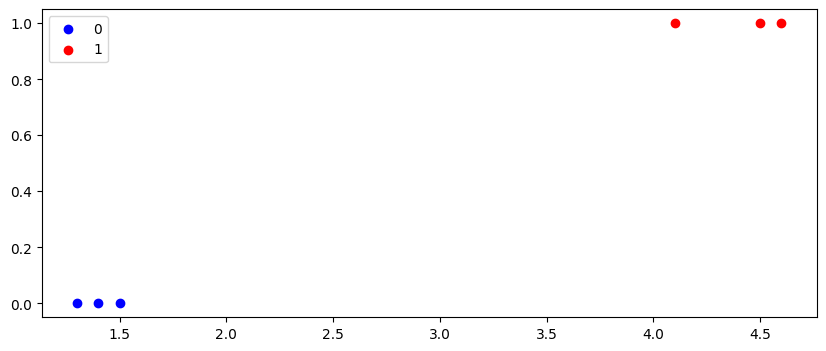

In [83]:
plt.figure(figsize=(10,4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()



## convert y to one-hot encoding

In [84]:
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, 2)
print(y_one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## initialize the parameters/ weights

In [85]:
N = len(X)
w = np.array([[0.2], [-0.1]])
b = np.array([[0.1], [0.05]])
lr = 0.1
losses = []
epoch_max = 100

# Training the model

In [86]:
for epoch in range(epoch_max):
    for i in range(N):
        xi = X[i]
        yi = y_one_hot[i]
        # print(yi)
        # print(yi.shape)
        # print()

        yi = yi.reshape(-1, 1)
        # print(yi)
        # print(yi.shape)
        
        # compute z
        z = xi*w + b
            # print(z)
        # predict 
        y_hat = (np.exp(z)) / (np.sum(np.exp(z), axis=0))

        # compute loss_funtion
        loss = -yi.T.dot(np.log(y_hat))
        losses.append(loss)
        # computte gradient
        dw_dl = xi*(y_hat - yi)
        db_dl = (y_hat - yi)

        # update weight
        w = w - lr*dw_dl
        b = b - lr*db_dl



# visualize

ValueError: x and y can be no greater than 2D, but have shapes (600,) and (600, 1, 1)

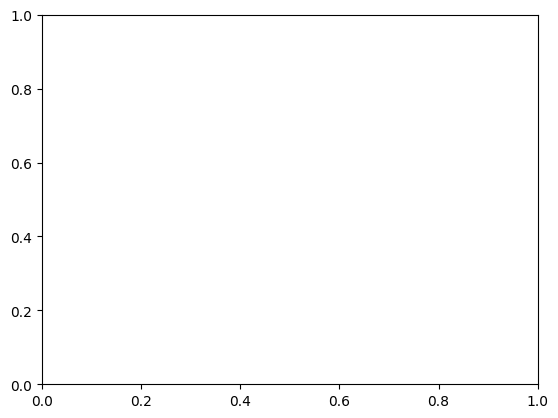

In [88]:
plt.plot(losses)